## The Sparks Foundation
## IoT and Computer Vision Internship
## Name: Ranjith S
## Task 1 : OBJECT DETECTION IN IMAGES AND VIDEOS

#### Importing the Libraries

In [13]:
import cv2
import matplotlib.pyplot as plt 

#### Using existing config file for our model

In [14]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [15]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

#### Loading the Labels

In [16]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels) 

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [17]:
print(len(classLabels))

80


#### Setting up the Config file

In [18]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001EEEF1E9AB0>

#### Reading the Image

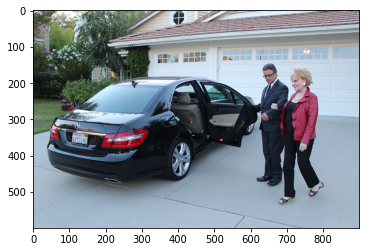

In [19]:
img = cv2.imread('car3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [21]:
print(ClassIndex)

[[3]
 [1]
 [1]]


#### Detection of Objects in Image 

In [22]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)
cv2.imshow('output',img);
cv2.waitKey(0)

-1

#### Detection of Objects in Video

In [23]:
cap = cv2.VideoCapture('traffic1.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold = 0.5)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)
    cv2.imshow('Output',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
                   break
cap.release()
cv2.destroyAllWindows()

[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [10]
 [10]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [10]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [ 3]
 [10]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 8]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 8]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 8]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 8]]
[[ 3]
 [ 8]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [10]


[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 

[[ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [10]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 3]
 [ 8]
 [ 1]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 1]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [10]
 [10]
 [ 3]
 [ 1]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 8]
 [10]
 [ 1]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 8]
 [10]
 [10]
 [ 3]
 [ 1]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [10]
 [10]
 [ 3]
 [ 1]
 [ 3]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3